# <a name="C2">Import des librairies

In [319]:
import os
import warnings

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import plotly.express as px

from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing, svm
from sklearn import decomposition
from sklearn import cluster, metrics
from sklearn import linear_model
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score , roc_curve, accuracy_score , precision_score, recall_score
from sklearn.metrics import precision_recall_fscore_support as score 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.metrics import classification_report 

import statsmodels
import statsmodels.api as smf
import statsmodels.api as sm
from statsmodels.api import Logit
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.compat import lzip
from scipy.stats import t, shapiro

import scipy.stats as stats
import scipy.stats as st
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import linkage, fcluster 
from pandas.plotting import parallel_coordinates

import math
from math import sqrt 

pd.options.display.float_format = "{:.3f}".format

sns.set()
warnings.filterwarnings('ignore')

# <a name="C2">Bibliothèque des fonctions d'OpenClassrooms 

In [320]:
palette = sns.color_palette("bright", 10)

def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    """Display correlation circles, one for each factorial plane"""

    # For each factorial plane
    for d1, d2 in axis_ranks: 
        if d2 < n_comp:

            # Initialise the matplotlib figure
            fig, ax = plt.subplots(figsize=(7,7))

            # Determine the limits of the chart
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # Add arrows
            # If there are more than 30 arrows, we do not display the triangle at the end
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (see the doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # Display variable names
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # Display circle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # Define the limits of the chart
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # Display grid lines
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # Label the axes, with the percentage of variance explained
            plt.xlabel('PC{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('PC{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Correlation Circle (PC{} and PC{})".format(d1+1, d2+1))
            plt.show(block=False)
def append_class(df, class_name, feature, thresholds, names):
    '''Append a new class feature named 'class_name' based on a threshold split of 'feature'.Threshold values are in 'thresholds' and class names are in 'names'.'''
    
    n = pd.cut(df[feature], bins = thresholds, labels=names)
    df[class_name] = n        
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    '''Display a scatter plot on a factorial plane, one for each factorial plane'''

    # For each factorial plane
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # Initialise the matplotlib figure      
            fig = plt.figure(figsize=(7,7))
        
            # Display the points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # Display the labels on the points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # Define the limits of the chart
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # Display grid lines
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # Label the axes, with the percentage of variance explained
            plt.xlabel('PC{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('PC{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection of points (on PC{} and PC{})".format(d1+1, d2+1))
            #plt.show(block=False)
            

# <a name="C2">Import du fichier, nettoyage et analyse des données

In [321]:
# Import du fichier
df_billets=pd.read_excel('billets(1).xls')
df_billets.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.810,104.860,104.950,4.520,2.890,112.830
1,True,171.460,103.360,103.660,3.770,2.990,113.090
2,True,172.690,104.480,103.500,4.400,2.940,113.160
3,True,171.360,103.910,103.940,3.620,3.010,113.510
4,True,171.730,104.280,103.460,4.040,3.480,112.540


Rappel (toutes les mesures en mm) :
  - length = longueur du billet,
  - height_left = hauteur du billet (mesurée sur le côté gauche),
  - height_right = hauteur du billet (mesurée sur le côté droit),
  - margin_up = marge entre le bord supérieur du billet et l'image,
  - margin_low = marge entre le bordd inférieur du billet et l'image,
  - diagonal = diagonale du billet.

In [322]:
# Vérification des infos du fichier
df_billets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


Ce data frame a 7 colonnes et 1500 lignes.
6 Variables sont de type float et 1 de type boolean.

In [323]:
# Valeurs uniques de chaque colonne
df_billets.nunique()

is_genuine        2
diagonal        159
height_left     155
height_right    170
margin_low      285
margin_up       123
length          336
dtype: int64

In [324]:
# Vérification des statistiques des colonnes
df_billets.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000,1500.000,1500.000,1463.000,1500.000,1500.000
mean,171.958,104.030,103.920,4.486,3.151,112.679
std,0.305,0.299,0.326,0.664,0.232,0.873
min,171.040,103.140,102.820,2.980,2.270,109.490
25%,171.750,103.820,103.710,4.015,2.990,112.030
50%,171.960,104.040,103.920,4.310,3.140,112.960
75%,172.170,104.230,104.150,4.870,3.310,113.340
max,173.010,104.880,104.950,6.900,3.910,114.440


In [325]:
# Nombre de vrais et faux billets
df_billets['is_genuine'].value_counts()

True     1000
False     500
Name: is_genuine, dtype: int64

Text(0.5, 1.0, 'Répartition des vrais et faux billets')

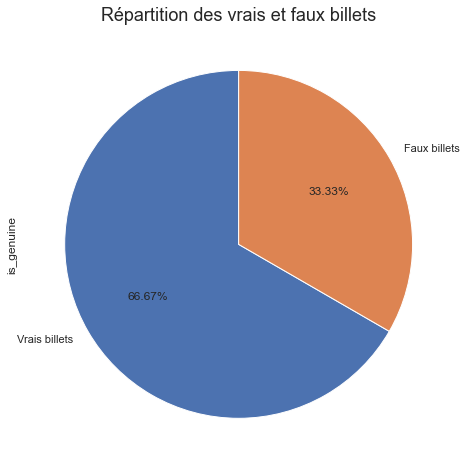

In [326]:
# Graphique de la répartition des billets
plt.figure(figsize=(12,8))
df_billets['is_genuine'].value_counts().plot(kind="pie",autopct='%1.2f%%', 
                                               labels=["Vrais billets","Faux billets"],startangle=90)
plt.title("Répartition des vrais et faux billets", fontsize=18)


In [327]:
# Statistiques des vrais et faux billets
df_billets.groupby('is_genuine').describe().T

is_genuine           False     True
diagonal     count 500.000 1000.000
             mean  171.901  171.987
             std     0.307    0.300
             min   171.040  171.040
             25%   171.690  171.790
             50%   171.910  171.990
             75%   172.093  172.200
             max   173.010  172.920
height_left  count 500.000 1000.000
             mean  104.190  103.949
             std     0.224    0.300
             min   103.510  103.140
             25%   104.040  103.740
             50%   104.180  103.950
             75%   104.332  104.140
             max   104.880  104.860
height_right count 500.000 1000.000
             mean  104.144  103.809
             std     0.271    0.292
             min   103.430  102.820
             25%   103.950  103.610
             50%   104.160  103.810
             75%   104.320  104.000
             max   104.950  104.950
margin_low   count 492.000  971.000
             mean    5.216    4.116
             std     0.554    0.319
             min     3.820    2.980
             25%     4.840    3.905
             50%     5.190    4.110
             75%     5.592    4.340
             max     6.900    5.040
margin_up    count 500.000 1000.000
             mean    3.350    3.052
             std     0.180    0.186
             min     2.920    2.270
             25%     3.220    2.930
             50%     3.350    3.050
             75%     3.473    3.180
             max     3.910    3.740
length       count 500.000 1000.000
             mean  111.631  113.202
             std     0.616    0.360
             min   109.490  111.760
             25%   111.200  112.950
             50%   111.630  113.205
             75%   112.030  113.460
             max   113.850  114.440

In [328]:
# Moyenne des dimensions des vrais et faux billets
Moyenne_billets=df_billets.groupby(by='is_genuine').mean().round(2)
Moyenne_billets

,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,,,,,,
False,171.900,104.190,104.140,5.220,3.350,111.630
True,171.990,103.950,103.810,4.120,3.050,113.200


Les faux billets sont plus petits en longueur mais sont plus hauts que les vrais, l'image est plus petite car les marges sont plus importantes.
Les vrais billets sont plus longs.

In [329]:
# Détection des valeurs nulles
print(df_billets.isnull().sum())

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64


Il y a 37 valeurs nulles dans la colonne margin_low sur 1 500 valeurs. 

In [330]:
# Identification des valeurs manquantes dans un nouveau data frame
df_billets_valeurs_manquantes=df_billets[df_billets.isnull().any(axis=1)]
df_billets_valeurs_manquantes

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.940,103.890,103.450,NaN,3.250,112.790
99,True,171.930,104.070,104.180,NaN,3.140,113.080
151,True,172.070,103.800,104.380,NaN,3.020,112.930
197,True,171.450,103.660,103.800,NaN,3.620,113.270
241,True,171.830,104.140,104.060,NaN,3.020,112.360
251,True,171.800,103.260,102.820,NaN,2.950,113.220
284,True,171.920,103.830,103.760,NaN,3.230,113.290
334,True,171.850,103.700,103.960,NaN,3.000,113.360
410,True,172.560,103.720,103.510,NaN,3.120,112.950
413,True,172.300,103.660,103.500,NaN,3.160,112.950


In [331]:
# Création d'un nouveau data frame sans les valeurs manquantes
df_billets_complet = df_billets.dropna()
df_billets_complet

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.810,104.860,104.950,4.520,2.890,112.830
1,True,171.460,103.360,103.660,3.770,2.990,113.090
2,True,172.690,104.480,103.500,4.400,2.940,113.160
3,True,171.360,103.910,103.940,3.620,3.010,113.510
4,True,171.730,104.280,103.460,4.040,3.480,112.540
...,...,...,...,...,...,...,...
1495,False,171.750,104.380,104.170,4.420,3.090,111.280
1496,False,172.190,104.630,104.440,5.270,3.370,110.970
1497,False,171.800,104.010,104.120,5.510,3.360,111.950
1498,False,172.060,104.280,104.060,5.170,3.460,112.250


In [332]:
# Détection des doublons
df_billets.loc[df_billets[['is_genuine','diagonal','height_left','height_right','margin_low','margin_up','length']]
               .duplicated(keep=False),:]

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length


Il n'y a pas de doublons.

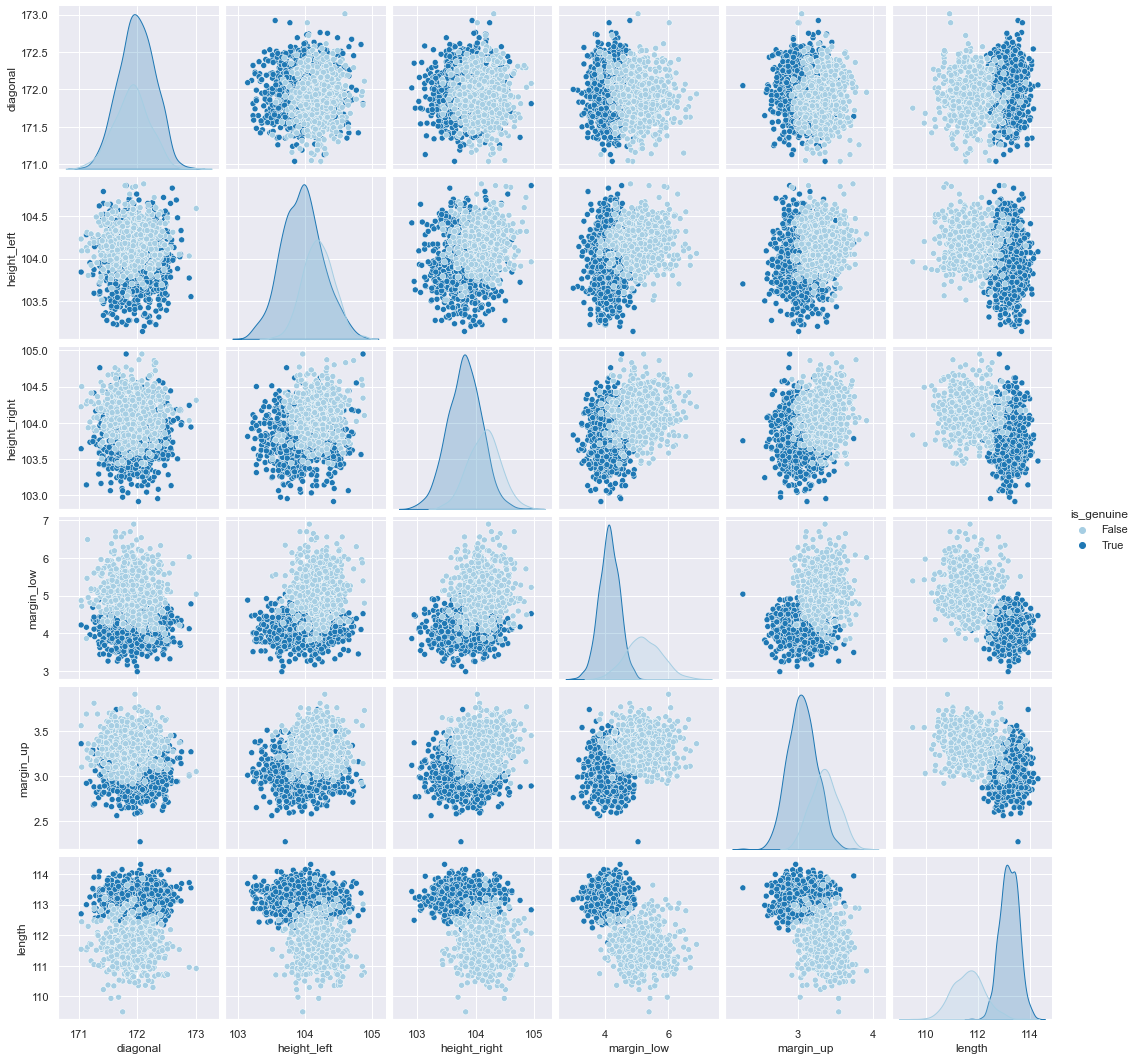

In [333]:
# Visualisation des données numériques
sns.pairplot(df_billets_complet, hue="is_genuine", palette="Paired")
plt.savefig("Visualisation des données numériques.png")
plt.show()

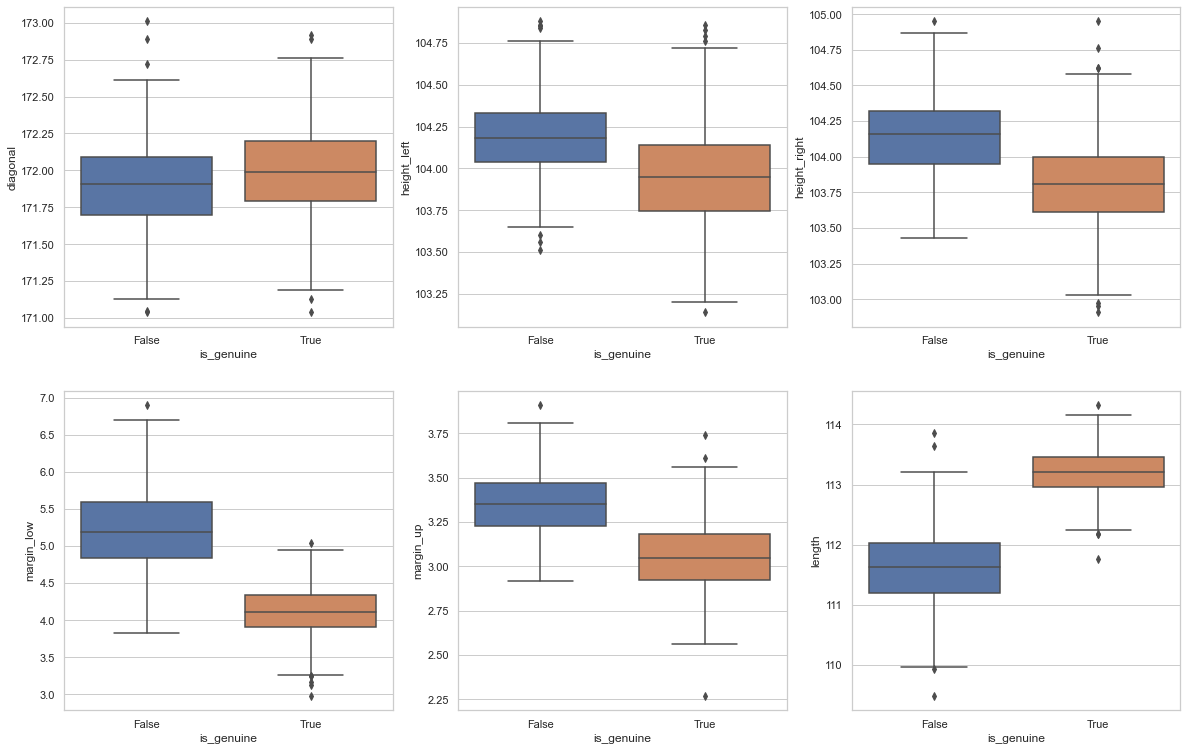

In [334]:
# Comparaison des variables par Boxplot  la colonne is_genuine est en abscisse et les différentes variables en ordonnée
plt.figure(figsize=(20, 20))
sns.set(style="whitegrid")

plt.subplot(331)
sns.boxplot(data=df_billets_complet, x='is_genuine', y='diagonal')

plt.subplot(332)
sns.boxplot(data=df_billets_complet, x='is_genuine', y='height_left')

plt.subplot(333)
sns.boxplot(data=df_billets_complet, x='is_genuine', y='height_right')

plt.subplot(334)
sns.boxplot(data=df_billets_complet, x='is_genuine', y='margin_low')

plt.subplot(335)
sns.boxplot(data=df_billets_complet, x='is_genuine', y='margin_up')

plt.subplot(336)
sns.boxplot(data=df_billets_complet, x='is_genuine', y="length")

plt.savefig("Comparaison des variables par Boxplot.png")
plt.show(block=False)


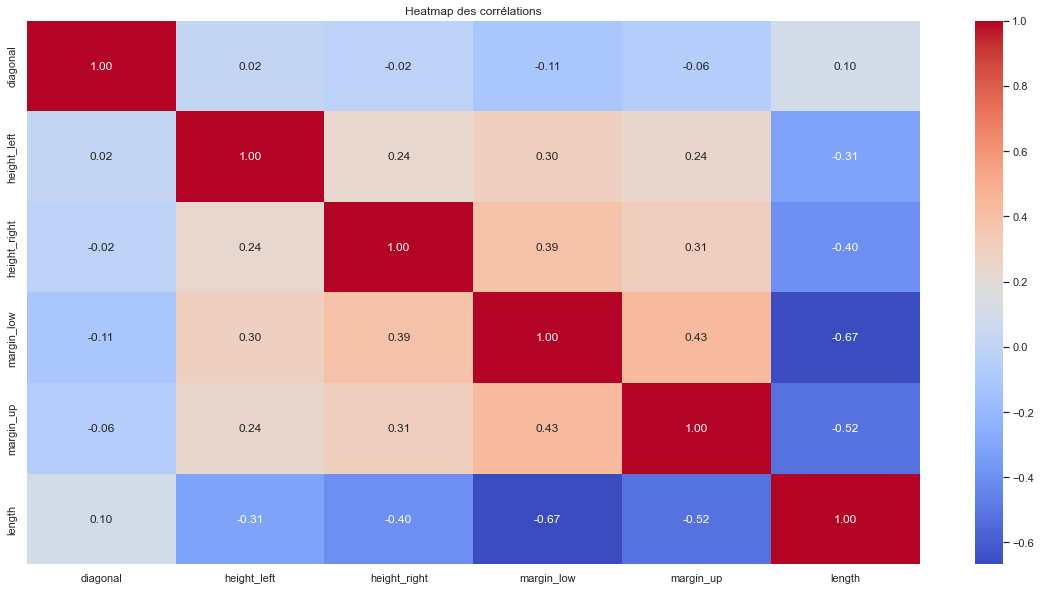

In [335]:
# Heatmap
# Avant de créer notre modèle on se rend compte qu’on a 6 variables explicatives pour savoir si un billet est vrai ou faux 
# (colonne is_genuine). Ainsi si on veut être malin on se pose les questions suivantes : dois-je choisir toutes ces variables 
# pour mon modèle ? Quelles sont les variables qui ont une forte relation linéaire avec la variable ‘is_genuine’. Pour répondre
# à ces interrogations on va faire une matrice de corrélation.

plt.figure(figsize=(20, 10))
sns.heatmap(df_billets_complet.iloc[:,1:].corr(),annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap des corrélations')   
plt.savefig("Heatmap.png")
plt.show()                                                                             

- Chiffre positif : corrélation positive, variable représentée positivement
- Chiffre proche de 0 : aucune corrélation
- Chiffre négatif : corrélation négative, variable représentée négativement

Il y a une forte corrélation positive entre les variables length et margin_low.


# <a name="C2">Régression linéaire pour remplacer les valeurs manquantes

La régression linéaire multiple permet d'expliquer, de manière linéaire, une variable dépendante Y (variable à expliquer), aléatoire en fonction de plusieurs variables explicatives (indépendantes) X.

La régression permet de juger de la qualité d'explication de la variable dépendante par les variables indépendantes.

In [336]:
# Nous créons maintenant un objet lr qui est le conteneur de notre modèle de régression multiple.
lr = LinearRegression()

In [337]:
# Data frame avec variables explicatives
X = df_billets_complet[['diagonal', 'height_left','height_right', 'margin_up','length']]
X

,diagonal,height_left,height_right,margin_up,length
0,171.810,104.860,104.950,2.890,112.830
1,171.460,103.360,103.660,2.990,113.090
2,172.690,104.480,103.500,2.940,113.160
3,171.360,103.910,103.940,3.010,113.510
4,171.730,104.280,103.460,3.480,112.540
...,...,...,...,...,...
1495,171.750,104.380,104.170,3.090,111.280
1496,172.190,104.630,104.440,3.370,110.970
1497,171.800,104.010,104.120,3.360,111.950
1498,172.060,104.280,104.060,3.460,112.250


In [338]:
# Isolation dans un vecteur séparé de la variable à expliquer "margin_low" 
y = df_billets_complet['margin_low']
y

0      4.520
1      3.770
2      4.400
3      3.620
4      4.040
        ... 
1495   4.420
1496   5.270
1497   5.510
1498   5.170
1499   4.630
Name: margin_low, Length: 1463, dtype: float64

In [339]:
# Une fois l'objet créé en utilisant la bibliothèque scikit-learn, nous ajustons le modèle (fit) en utilisant nos données. 
# Entraînement de notre modèle avec la méthode fit
# J'ai donc pris comme variable dépendante y, la variable margin_low et comme variables indépendantes toutes les autres 
#variables.
lr.fit(X, y)

LinearRegression()

In [340]:
# Utilisation de notre modèle pour faire des prédictions
y_pred = lr.predict(X)
y_pred

array([4.78867649, 4.13890773, 4.12593262, ..., 4.90027735, 4.80857449,
       4.83903233])

22.994842714447913
[-0.11105978  0.18412242  0.25713805  0.2561879  -0.40910293]


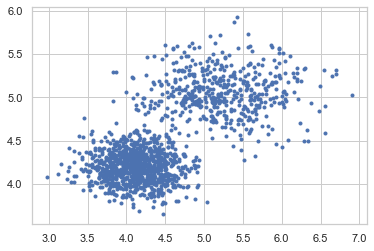

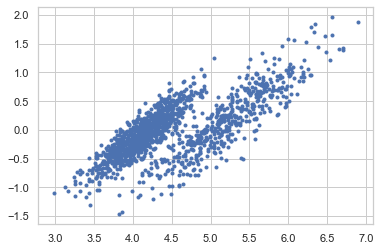

In [341]:
# Affichage des résultats
# Une fois le modèle ajusté, nous affichons, la constante, les coefficients, le R² et le RMSE.
# Nous obtenons deux graphiques représentant : les valeurs de y en fonction des valeurs 
# prédites avec le modèle de régresssion linéaire et les valeurs de Y en fonction des résidus.
# RMSE L'écart quadratique moyen (RMSE) est l'écart-type des résidus (erreurs de prévision). Les résidus sont la mesure de 
#l'écart entre les points de données et la ligne de régression. La métrique RMSE est la mesure de la ventilation de ces
#résidus. En d'autres termes, elle indique la concentration des données autour de la ligne du meilleur ajustement.

print(lr.intercept_)
print(lr.coef_)

#calcul du R²
lr.score(X,y)

RMSE=np.sqrt(((y-lr.predict(X))**2).sum()/len(y))

plt.plot(y, lr.predict(X),'.')
plt.show()

plt.plot(y, y-lr.predict(X),'.')
plt.show()


In [342]:
# Le R², ou R-carré est appelé coefficient de détermination. C’est un indicateur utilisé en statistiques pour juger de la 
# qualité d’une régression linéaire. 
# Mathématiquement, il s’agit de la proportion de la variance d’une variable dépendante qui s’explique par une ou plusieurs 
# variables indépendantes dans le modèle de régression. On l’exprime entre 0 et 1.
# Calcul le r2 score de notre modèle de deux facons
lr.score(X,y).round(2)

0.48

In [343]:
r2_score(y, y_pred).round(2)

0.48

Interprétation des valeurs de R carré

Ce coefficient est compris entre 0 et 1, et croît avec l’adéquation de la régression au modèle:

–        Si le R² est proche de zéro, alors la droite de régression colle à 0% avec l’ensemble des points donnés.

–        Si le R2 d’un modèle est de 0,50, alors la moitié de la variation observée dans le modèle calculé peut être expliquée par les points

–       Si le R² est de 1, alors la régression détermine 100% de la distribution des points.

En pratique, il est impossible d’obtenir un R2 de 1 à partir de données empiriques. On considère qu’un R carré est élevé lorsqu’ils se situe entre 0.85 et 1

In [344]:
# OLS (Ordinary Least Square, ou méthode des moindres carrés)
# On utilise la commande lm pour régresser margin_low en fonction des autres variables
reg_multi = ols("margin_low ~ diagonal + height_left + height_right + margin_up + length", data = df_billets)
reg_multi = reg_multi.fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     266.1
Date:                Tue, 11 Apr 2023   Prob (F-statistic):          2.60e-202
Time:                        14:27:33   Log-Likelihood:                -1001.3
No. Observations:                1463   AIC:                             2015.
Df Residuals:                    1457   BIC:                             2046.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       22.9948      9.656      2.382   

On constate ici que tous les paramètres ont une p-valeur inférieure à 5 %, proche de 0, le niveau de test que nous souhaitons.

Le test de Durbin-Watson est un test statistique destiné à tester l'autocorrélation des résidus dans un modèle de régression linéaire.

La statistique de Durbin-Watson est dite normale si elle avoisine la valeur 2.

# _Analyse des résultats_

<AxesSubplot:>

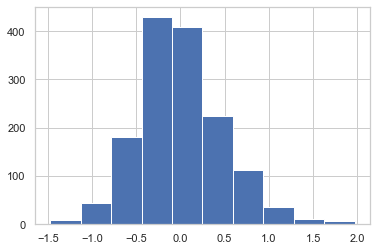

In [345]:
# Les résidus ou » erreurs observées » sont définis comme étant les différences entre les valeurs observées et les valeurs
# estimées par un modèle de régression, ils ont la particularité de représenter la partie non expliquée par l'équation de 
# régression

# Etude des résidus
prediction = lr.predict(X)
residual = (y - prediction)

residual.hist()

L'allure de l'histogramme est assez classique : centrée sur 0 et à peu près symétrique.

In [346]:
# Statistiques des résidus
residual.describe().round(2)

count   1463.000
mean       0.000
std        0.480
min       -1.470
25%       -0.320
50%       -0.040
75%        0.270
max        1.970
Name: margin_low, dtype: float64

# _Vérifier la colinéarité des variables_

In [347]:
# VIF colinéarité des variables
# Au cours de l'analyse de régression, VIF évalue si les facteurs sont corrélés les uns aux autres (multi-colinéarité),
# ce qui pourrait influencer les autres facteurs et réduire la fiabilité du modèle.

variables = reg_multi.model.exog
variable = ['diagonal', 'height_left', 'height_right', 'margin_up', 'length']
vif = [variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]
pd.DataFrame([variable, vif]).T.rename(columns={0:'variable', 1:'vif'})

,variable,vif
0,diagonal,1.014
1,height_left,1.138
2,height_right,1.230
3,margin_up,1.404
4,length,1.577


Les coefficients sont tous inférieurs à 10, il n'y a donc pas de problèmes de colinéarité.

# _Tester l’homoscédasticité_

In [348]:
# L'homoscédasticité est une caractéristique d'un modèle de régression linéaire qui implique que la variance des erreurs est
#constante dans le temps
# Test de l’homoscédasticité des résidus (constance de la variance) 
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(reg_multi.resid, variables)
print('p value test Breusch Pagan:', pval)

p value test Breusch Pagan: 7.759535216194938e-16


La p-valeur ici n'est pas inférieure à 5 %, on ne rejette pas l'hypothèse selon laquelle les variances sont constantes (hypothèse d’homoscédasticité).

# _Tester la normalité des résidus_

In [349]:
# Test de la normalité des résidus
shapiro(reg_multi.resid)

ShapiroResult(statistic=0.9857879281044006, pvalue=8.536943374437556e-11)

L'hypothèse nulle est rejetée, pval > 0.50, les résidus ne suivent pas une loi normale.
Compte tenu de la taille de l'échantillon, ici 1500, de l'analyse des résidus, on peut considérer ces résultats.

# _Utilisation de notre modèle pour déterminer les valeurs manquantes_

In [350]:
# Utilisation de notre modèle pour determiner les valeurs manquantes
y_pred = lr.predict(X)
y_pred

array([4.78867649, 4.13890773, 4.12593262, ..., 4.90027735, 4.80857449,
       4.83903233])

In [351]:
#  Utilisation de notre modèle pour déterminer les valeurs manquantes
df_billets_valeurs_manquantes['margin_low'] = lr.predict(df_billets_valeurs_manquantes
                                                           [['diagonal', 'height_left', 'height_right','margin_up', 'length']])

In [352]:
# Concaténation des 2 data frames initiaux
df_billets_analyse = pd.concat([df_billets_complet, df_billets_valeurs_manquantes])
df_billets_analyse.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.810,104.860,104.950,4.520,2.890,112.830
1,True,171.460,103.360,103.660,3.770,2.990,113.090
2,True,172.690,104.480,103.500,4.400,2.940,113.160
3,True,171.360,103.910,103.940,3.620,3.010,113.510
4,True,171.730,104.280,103.460,4.040,3.480,112.540


# <a name="C3">I - ACP

In [353]:
# Avant d'appliquer une ACP, il faut procéder au centrage et à la réduction des données
#Les 2 lignes permettent de mettre à l'échelle toutes les observations et de les stocker dans un nouveau data frame
df_billets_acp=df_billets_analyse[['diagonal','height_left','height_right','margin_low','margin_up','length']]
n=df_billets_acp.shape[0]
p=df_billets_acp.shape[1]
s_scaler=StandardScaler()
scaled_data=s_scaler.fit_transform(df_billets_acp)

In [354]:
# Vérification des données après mise à l'échelle en affichant les moyennes de nos 6 variables
print(np.mean(scaled_data ,axis=0))

[ 1.46466543e-14  4.81274280e-14 -2.78343274e-14  6.06329801e-16
 -1.06107715e-15  5.30538576e-16]


In [355]:
# Application de l'ACP sur les données mises à l'échelle
# Les 2 lignes suivantes appliquent la procédure de l'ACP via l'objet pca de type PCA sur les données scaled_data
pca=PCA()
coords=pca.fit_transform(scaled_data)
# La fonction fit_transform retourne les coordonnées de chaque individu analysé dans les nouveaux axes créés par l'ACP.

In [356]:
# L’inertie mesure la dispersion totale du nuage de points
# Affichage du taux de l'inertie totale expliquée par chacun des 9 axes construits avec l'application de l'ACP
pca.explained_variance_ratio_.round(2)

array([0.43, 0.17, 0.13, 0.12, 0.1 , 0.05])

Ces résultats montrent que :

- le premier axe explique à lui tout seul 43,29 % de l'inertie totale,
- le deuxième axe explique à lui tout seul 16,96 % de l'inertie totale,
- le troisième axe explique à lui tout seul 13,02 % de l'inertie totale,
- le quatrième axe explique à lui tout seul 11,82 % de l'inertie totale, et ainsi de suite.

In [357]:
# Ratio de variance sous forme d'une somme cumulée :
pca.explained_variance_ratio_.cumsum()

array([0.43288253, 0.60244869, 0.73269932, 0.85094803, 0.94697507,
       1.        ])

Text(0.5, 1.0, 'Cumul de la variance expliquée vs nombre de facteurs')

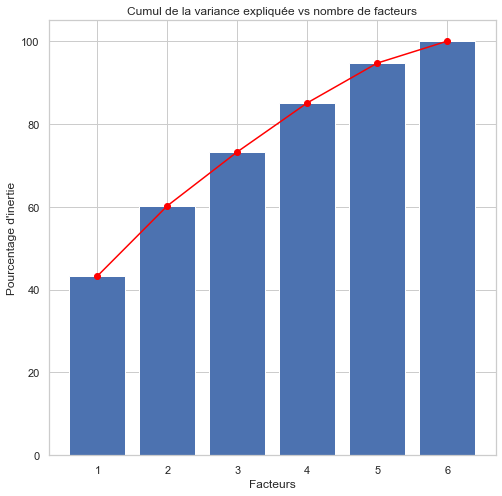

In [358]:
# Graphique
fig, axes = plt.subplots(figsize=(8,8)) 
axes.set_xticks(np.arange(11)) 
axes.plot(np.arange(1,p+1),np.cumsum(pca.explained_variance_ratio_*100),c="red",marker='o') 
plt.bar(np.arange(1,p+1), np.cumsum(pca.explained_variance_ratio_*100)) 
plt.xlabel("Facteurs")
plt.ylabel("Pourcentage d'inertie")
plt.title("Cumul de la variance expliquée vs nombre de facteurs")  

Cette courbe permet d’affirmer visuellement que le plan formé par les quatre premiers axes explique environ 85 % de l’inertie totale.


In [359]:
# Nombre de composantes
num_components = 4
pcs = pca.components_ 
pc1 = pca.components_[0]
pc2 = pca.components_[1]
pc3 = pca.components_[2]
pc4 = pca.components_[3]

In [360]:
# Observation de la composante pc1
pc1

array([-0.08469767,  0.33063448,  0.39355544,  0.50769282,  0.4394146 ,
       -0.52705225])

In [361]:
# Observation de la composante pc2
pc2

array([ 0.94130387,  0.30752844,  0.10833184, -0.07243963, -0.00495445,
        0.04863598])

In [362]:
# Observation de la composante pc3
pc3

array([-0.28784296,  0.88504887, -0.16356327, -0.10904608, -0.27011168,
        0.14909938])

In [363]:
# Observation de la composante pc4
pc4

array([-0.10196124, -0.04924399,  0.86656155, -0.08927108, -0.44404699,
        0.17636033])

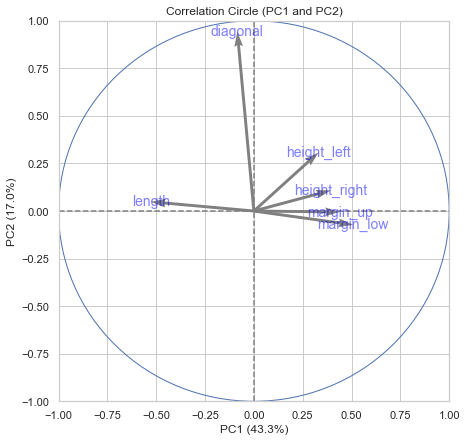

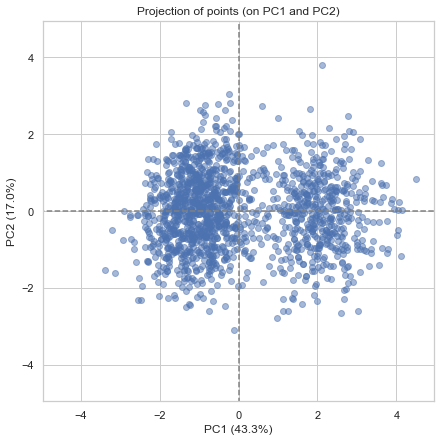

In [364]:
# Cercle des corrélations et projections des points PC1 et PC2
X_projected = pca.transform(scaled_data)
display_circles(pcs, num_components, pca, [(0,1)], labels = np.array(df_billets_acp.columns))
display_factorial_planes(X_projected, num_components, pca, [(0,1)], alpha = 0.5)
plt.show()

Les variables les plus corrélées à PC1 sont :
- Margin_low
- Margin_up
- Height_right
- Length

Les variables les plus corrélées à PC2 sont :
- Diagonal

# <a name="C3">II - METHODE DES K-MEANS

Kmeans est un algorithme itératif qui fonctionne en 2 étapes :

   - Affectation des points au centre le plus proche
   - Déplacement du centre à la moyenne du cluster

In [365]:
# Utilisation du data frame utilisé précédemment pour l'ACP
scaled_data

array([[-0.48653957,  2.77412327,  3.16324041,  0.0553898 , -1.128325  ,
         0.17365114],
       [-1.63372936, -2.23653528, -0.79966777, -1.08198744, -0.69679916,
         0.47166629],
       [ 2.3978233 ,  1.50475644, -1.29119126, -0.12659056, -0.91256208,
         0.55190114],
       ...,
       [-0.78153123,  1.43794766,  0.61346228,  1.88579829,  1.97866106,
        -2.71480344],
       [ 2.29949275,  1.00369058,  1.50434862,  1.06517171,  1.76289814,
        -1.38519737],
       [-0.19154792,  0.83666863,  1.135706  ,  0.99568639,  0.38201544,
        -1.36227312]])

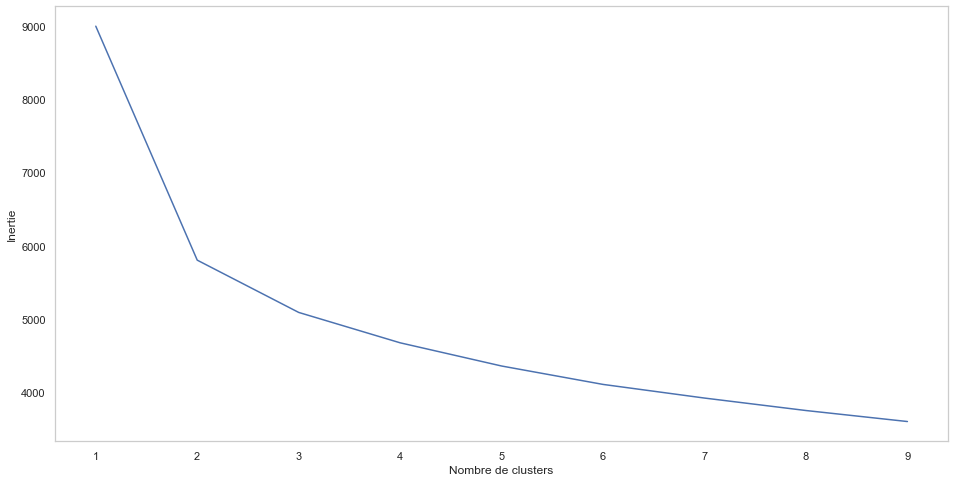

In [366]:
# Méthode du coude pour déterminer le nombre de clusters
inertia = []
k_range=range(1,10)
for k in k_range:
    model=KMeans(n_clusters=k).fit(scaled_data)
    inertia.append(model.inertia_)
    
fig = plt.figure(figsize=(16,8))
plt.plot(k_range,inertia )
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.grid()
plt.show()

On observe une cassure à partir du deuxième cluster.

In [367]:
# Visualisation des clusters
# Clustering par K-means
kmeans = KMeans(init='random', n_clusters=2, n_init=10)
kmeans.fit(scaled_data)
clusters =  kmeans.fit_predict(scaled_data)

# Ajout du numéro de cluster au data frame
scaled_data_kmeans = pd.DataFrame(scaled_data, columns=df_billets_acp.columns, index=df_billets_acp.index)
scaled_data_kmeans['cluster'] = clusters
scaled_data_kmeans.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,cluster
0,-0.487,2.774,3.163,0.055,-1.128,0.174,1
1,-1.634,-2.237,-0.800,-1.082,-0.697,0.472,0
2,2.398,1.505,-1.291,-0.127,-0.913,0.552,0
3,-1.961,-0.399,0.060,-1.309,-0.610,0.953,0
4,-0.749,0.837,-1.414,-0.673,1.418,-0.159,0


In [368]:
# Création d'un modèle PCA pour réduire nos données à 2 dimensions pour la visualisation
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(n_components=2)

In [369]:
# Transférer les scaled data dans le nouvel espace ACP
X_reduced = pca.transform(scaled_data)
centres_reduced = pca.transform(kmeans.cluster_centers_)

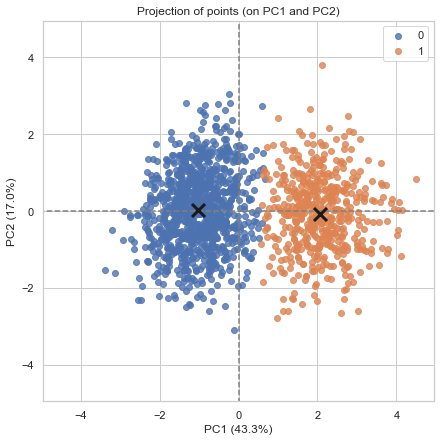

In [370]:
# Graphique avec les clusters et leurs centroïdes
display_factorial_planes(coords, 2, pca, [(0,1)], illustrative_var = kmeans.labels_, alpha = 0.8)
plt.scatter(centres_reduced[:, 0], centres_reduced[:, 1],
            marker='x', s=169, linewidths=3,
            color='k', zorder=10)

In [371]:
# Centroïdes
centroides = kmeans.cluster_centers_.round(2)
centroides

array([[ 0.1 , -0.28, -0.35, -0.55, -0.43,  0.59],
       [-0.19,  0.57,  0.71,  1.12,  0.86, -1.2 ]])

In [372]:
# Comparaison des moyennes kmeans (centroïdes)
kmeans_moyenne =  scaled_data_kmeans.groupby(by="cluster").mean()
kmeans_moyenne.head()

,diagonal,height_left,height_right,margin_low,margin_up,length
cluster,,,,,,
0,0.096,-0.282,-0.352,-0.552,-0.427,0.593
1,-0.194,0.571,0.713,1.118,0.864,-1.201


In [373]:
# Ajout du numéro de cluster au data frame df_billets_analyse
data_kmeans = df_billets_analyse.copy()
data_kmeans = pd.DataFrame(df_billets_analyse, index=data_kmeans.index, 
                           columns=data_kmeans.columns)
data_kmeans["cluster_kmeans"] = clusters
data_kmeans.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,cluster_kmeans
0,True,171.810,104.860,104.950,4.520,2.890,112.830,1
1,True,171.460,103.360,103.660,3.770,2.990,113.090,0
2,True,172.690,104.480,103.500,4.400,2.940,113.160,0
3,True,171.360,103.910,103.940,3.620,3.010,113.510,0
4,True,171.730,104.280,103.460,4.040,3.480,112.540,0


In [374]:
# Visualisation des données
data_kmeans['is_genuine'] = data_kmeans['is_genuine'].map({True:1, False:0})
data_kmeans

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,cluster_kmeans
0,1,171.810,104.860,104.950,4.520,2.890,112.830,1
1,1,171.460,103.360,103.660,3.770,2.990,113.090,0
2,1,172.690,104.480,103.500,4.400,2.940,113.160,0
3,1,171.360,103.910,103.940,3.620,3.010,113.510,0
4,1,171.730,104.280,103.460,4.040,3.480,112.540,0
...,...,...,...,...,...,...,...,...
1303,0,172.170,104.490,103.760,5.048,2.930,111.210,1
1315,0,172.080,104.150,104.170,4.779,3.400,112.290,1
1347,0,171.720,104.460,104.120,5.727,3.610,110.310,1
1435,0,172.660,104.330,104.410,5.186,3.560,111.470,1


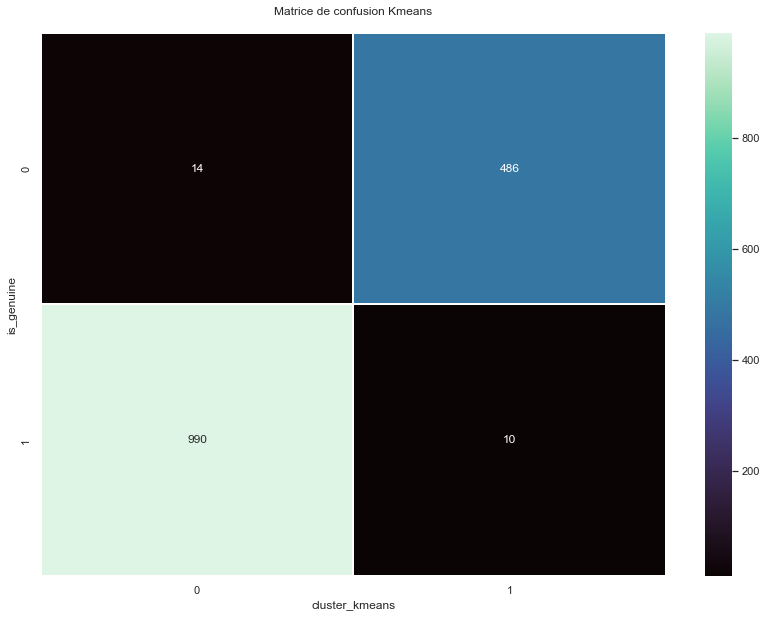

In [375]:
# Matrice de confusion Kmeans
# La matrice de confusion est en quelque sorte un résumé des résultats de prédiction pour un problème particulier de
# classification. Elle compare les données réelles pour une variable cible à celles prédites par un modèle. Les prédictions
# justes et fausses sont révélées et réparties par classe, ce qui permet de les comparer avec des valeurs définies.
conf_matrix = pd.crosstab(data_kmeans['is_genuine'], 
                          kmeans.labels_)
plt.figure(figsize=(14,10))
sns.heatmap(conf_matrix, annot = True, fmt = ".3g",  cmap = sns.color_palette("mako", as_cmap=True),
            linecolor = "white", linewidths = 0.3)
plt.xlabel("cluster_kmeans")
plt.title("Matrice de confusion Kmeans\n")
plt.savefig("Matrice de confusion Kmeans.png")
plt.show()     

- Sur les 1000 vrais billets il y en a 10 qui sont des faux positifs, soit un pourcentage d'erreur d'1 %,
- Sur les 500 faux billets, il y en a 14 qui sont des faux négatifs, soit un pourcentage d'erreur de 2,8 %.

La matrice de confusion permet de connaître d'une part les différentes erreurs commises par un algorithme de prédiction,
mais plus important encore, de connaître les différents types d'erreurs commis. En les analysant, il est possible de déterminer
les résultats qui indiquent comment ces erreurs ont eu lieu.

# <a name="C3">III - REGRESSION LOGISTIQUE

In [376]:
# La régression logistique est une méthode d'analyse statistique qui consiste à prédire une valeur de données d'après les
# observations réelles d'un jeu de données.

In [377]:
# Création d'un data frame pour la régression logistique et les variables utiliséées 
df_reg_log=df_billets_analyse
x = df_reg_log.iloc[:, 1:]
y = df_reg_log.iloc[:, 0]

In [378]:
# Pour faire ça correctement, il faut séparer les données en trois parties : un jeu d’entraînement, un jeu de validation et un
# jeu de test
# Le jeu d’entraînement sert à entraîner divers modèles. 
# Le jeu de validation sert à sélectionner un modèle : on choisit celui qui a la meilleure performance sur ce jeu
# le jeu de test sert à estimer la performance en généralisation du modèle


In [379]:
# Fonction qui sépare nos datas en 1 train set et 1 test set pour entraînement
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20,random_state=42)
# En général, les données sont séparées avec les proportions suivantes : 80 % pour le training set et 20 % pour le testing set
print('Train set: ',x_train.shape)
print('Test set: ',x_test.shape)

Train set:  (1200, 6)
Test set:  (300, 6)


In [380]:
# Instanciation du modèle
reg_log = linear_model.LogisticRegression(random_state = 0,solver = 'liblinear', multi_class = 'auto')
reg_log.fit(x_train, y_train)


LogisticRegression(random_state=0, solver='liblinear')

In [381]:
# Précision du modèle
precision_test = reg_log.score(x_test,y_test)
precision_train=reg_log.score(x_train,y_train)
print("Taux de précision du modèle d'entraînement :",round(precision_train*100,2),"%")
print("Taux de précision du modèle de test :",round(precision_test*100,2),"%")


Taux de précision du modèle d'entraînement : 99.08 %
Taux de précision du modèle de test : 98.67 %


In [382]:
# Prédictions
y_pred_test = reg_log.predict(x_test)
y_pred_test

array([False, False,  True,  True,  True,  True, False,  True, False,
        True,  True, False,  True, False,  True, False,  True,  True,
        True,  True, False, False, False, False, False,  True, False,
        True, False, False, False,  True, False, False,  True,  True,
        True,  True, False,  True, False,  True, False,  True, False,
        True,  True,  True,  True, False,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True, False, False,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True, False, False,  True,  True,  True, False,
        True, False,  True, False, False,  True,  True,  True, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False,  True,  True, False,
       False,  True,

In [383]:
# Rapport de classification
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

       False       0.97      0.99      0.98       111
        True       0.99      0.98      0.99       189

    accuracy                           0.99       300
   macro avg       0.98      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



In [384]:
# Visualisation des données de la matrice 
conf_matrix_reglog = pd.crosstab(y_test, y_pred_test)
conf_matrix_reglog 

col_0,False,True
is_genuine,,
False,110,1
True,3,186


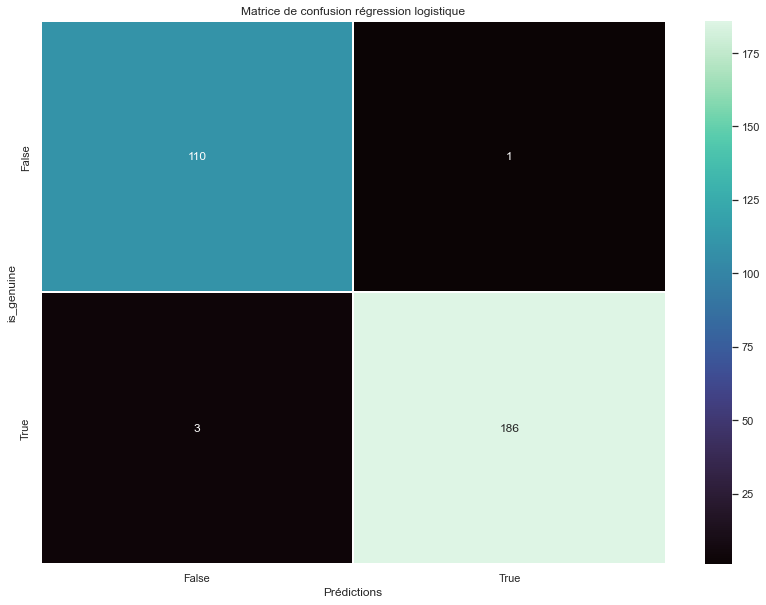

In [385]:
# Matrice de confusion régression logistique
# La matrice de confusion est en quelque sorte un résumé des résultats de prédiction pour un problème particulier de
# classification. Elle compare les données réelles pour une variable cible à celles prédites par un modèle. Les prédictions
# justes et fausses sont révélées et réparties par classe, ce qui permet de les comparer avec des valeurs définies.

plt.figure(figsize=(14,10))
conf_matrix_reglog = pd.crosstab(y_test, y_pred_test)
sns.heatmap(conf_matrix_reglog, annot = True, fmt = ".3g",  cmap = sns.color_palette("mako", as_cmap=True),
            linecolor = "white", linewidths = 0.3)
plt.xlabel("Prédictions")
plt.title("Matrice de confusion régression logistique")
plt.savefig("Matrice de confusion régression logistique.png")
plt.show()

- Sur les 189 vrais billets il y en a 3 qui sont des faux positif,
- Sur les 111 faux billets, il y en a 1 qui est un faux négatif.


Avantages :
La régression logistique est un algorithme de classification simple et efficace, alors il ne nécessite pas une grande puissance de calcul et il est facile à mettre en œuvre. Ce modèle d’apprentissage est largement utilisé par les analystes de données et les scientifiques et il ne nécessite pas de mise à l’échelle des fonctionnalités.
Enfin, la régression logistique fournit un score de probabilité pour les observations.

Limites :
La régression logistique n’est pas adaptée à un  grand nombre de caractéristiques. Cet algorithme ne peut pas résoudre le problème de non-linéarité ce qui nécessite la transformation des caractéristiques non linéaires.
Ainsi, la régression logistique ne fonctionne pas bien avec des variables indépendantes qui ne sont pas corrélées à la variable cible et qui sont très similaires entre elles.

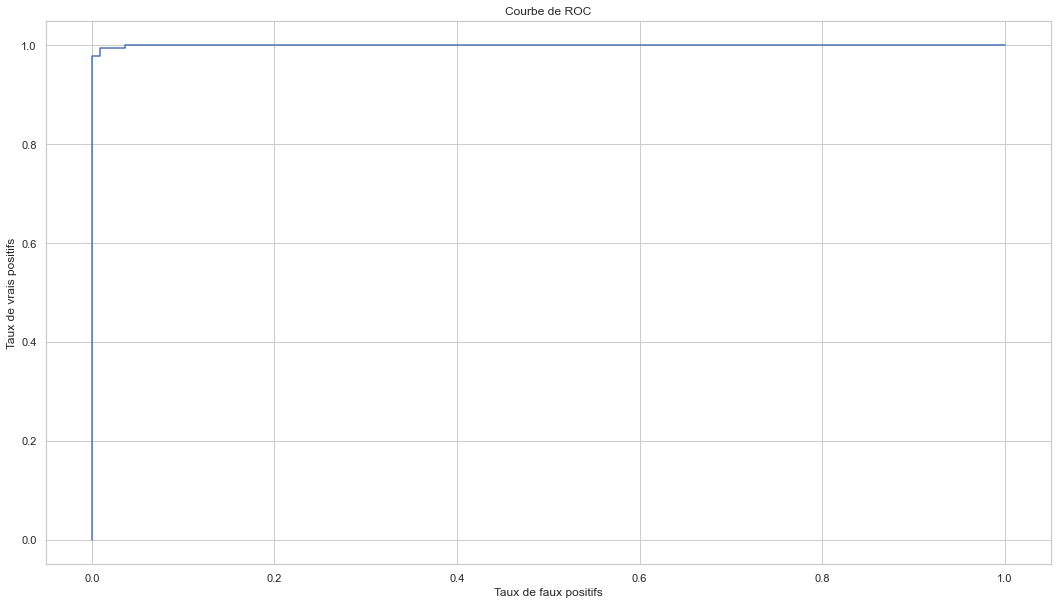

In [386]:
# La courbe ROC (Receiver Operating Characteristic) représente la sensibilité en fonction de la spécificité pour différents 
# seuils de décision s . L'aire sous la courbe ROC , l' AUC (Area Under the ROC), est une mesure de la qualité de la 
# classification qui varie entre :
# AUC=12 : dans le pire des cas ;
# AUC=1 : dans le meilleur des cas.

# Mesures
plt.figure(figsize=(18,10))
y_pred_proba = reg_log.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

# Courbe ROC
plt.plot(fpr,tpr)
plt.ylabel('Taux de vrais positifs')
plt.xlabel('Taux de faux positifs')
plt.title("Courbe de ROC")
plt.show()

L' AUC (Area Under the ROC),mesure de la qualité de la classification est quasiment à 1, ce qui est une très bonne qualité.

## Test du modèle de prédiction de régression logistique

## _1er essai_

In [387]:
# Importation du fichier test billets production
df_billets_prod = pd.read_csv("billets_production.csv")
df_billets_prod.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.760,104.010,103.540,5.210,3.300,111.420,A_1
1,171.870,104.170,104.130,6.000,3.310,112.090,A_2
2,172.000,104.580,104.290,4.990,3.390,111.570,A_3
3,172.490,104.550,104.340,4.440,3.030,113.200,A_4
4,171.650,103.630,103.560,3.770,3.160,113.330,A_5


In [388]:
# Suppression de la colonne id
df_prod=df_billets_prod.drop(['id'], axis=1)

In [389]:
# Prédiction fichier test
y_pred_billets_prod = reg_log.predict(df_prod)
y_pred_billets_prod

array([False, False, False,  True,  True])

In [390]:
# Probabilités de vrais billets
probabilité_vrai = reg_log.predict_proba(df_prod)[:, 1]
probabilité_vrai

array([6.20278314e-03, 9.43356757e-04, 1.54872407e-03, 9.14321982e-01,
       9.99571926e-01])

In [391]:
# Ajout de 2 nouvelles colonnes dans data frame test billets production
df_billets_prod['Prédiction'] = y_pred_billets_prod
df_billets_prod['Probabilité vrai en %'] = probabilité_vrai.round(2)*100
df_billets_prod

,diagonal,height_left,height_right,margin_low,margin_up,length,id,Prédiction,Probabilité vrai en %
0,171.760,104.010,103.540,5.210,3.300,111.420,A_1,False,1.000
1,171.870,104.170,104.130,6.000,3.310,112.090,A_2,False,0.000
2,172.000,104.580,104.290,4.990,3.390,111.570,A_3,False,0.000
3,172.490,104.550,104.340,4.440,3.030,113.200,A_4,True,91.000
4,171.650,103.630,103.560,3.770,3.160,113.330,A_5,True,100.000


Les 3 premiers billets sont faux et les 2 derniers sont vrais.

## _2ème essai_

In [392]:
#Prédire les billets de production avec la régression logistique
df_test = pd.read_csv('billets_production.csv', sep=",", decimal=".", header=0)

df_test = df_test.drop(["id"], axis=1)
df_test[["Probabilité faux","Probabilité vrai"]] = reg_log.predict_proba(df_test)
df_test["Vrai ou faux"] = reg_log.predict(df_test[["diagonal","height_left","height_right","margin_low","margin_up","length"]])

df_test

,diagonal,height_left,height_right,margin_low,margin_up,length,Probabilité faux,Probabilité vrai,Vrai ou faux
0,171.760,104.010,103.540,5.210,3.300,111.420,0.994,0.006,False
1,171.870,104.170,104.130,6.000,3.310,112.090,0.999,0.001,False
2,172.000,104.580,104.290,4.990,3.390,111.570,0.998,0.002,False
3,172.490,104.550,104.340,4.440,3.030,113.200,0.086,0.914,True
4,171.650,103.630,103.560,3.770,3.160,113.330,0.000,1.000,True


# _Prédictions test final_

In [393]:
#Prédire les billets avec la régression logistique
df_test_final = pd.read_csv('billets_test(2).csv', sep=",", decimal=".", header=0)

df_test_final = df_test_final.drop(["id"], axis=1)
df_test_final[["Probabilité faux","Probabilité vrai"]] = reg_log.predict_proba(df_test_final)
df_test_final["Vrai ou faux"] = reg_log.predict(df_test_final[["diagonal","height_left","height_right","margin_low","margin_up","length"]])

df_test_final



,diagonal,height_left,height_right,margin_low,margin_up,length,Probabilité faux,Probabilité vrai,Vrai ou faux
0,172.090,103.950,103.730,4.390,3.090,113.190,0.011,0.989,True
1,171.520,104.170,104.030,5.270,3.160,111.820,0.991,0.009,False
2,171.780,103.800,103.750,3.810,3.240,113.390,0.001,0.999,True
3,172.020,104.080,103.990,5.570,3.300,111.100,1.000,0.000,False
4,171.790,104.340,104.370,5.000,3.070,111.870,0.986,0.014,False
